In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment
import numpy as np

In [3]:
# Be sure that your wav file is mono (single channel) and not stereo (dual channel) before trying to do this
sound = AudioSegment.from_wav("Piano_1.wav")
sound = sound.set_channels(1)
sound.export("Mono_1.wav", format="wav")

sample_rate, samples = wavfile.read("Mono_1.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

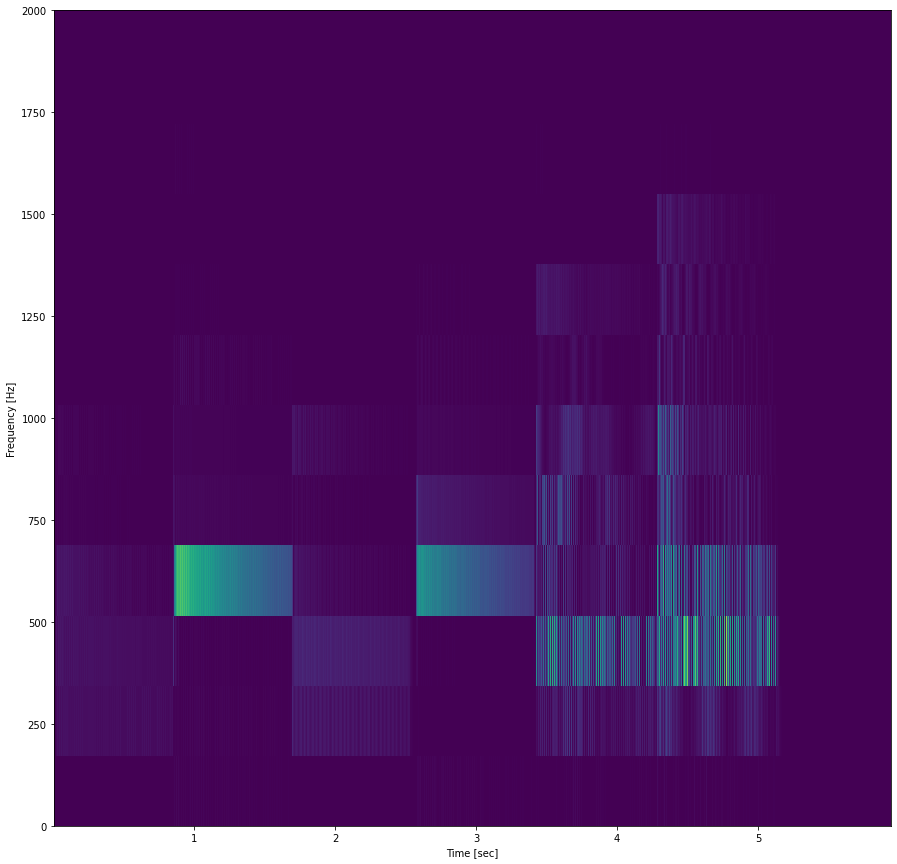

In [4]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.pcolormesh(times, frequencies, spectrogram)
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 2000])
plt.show()

In [22]:
_, gen = signal.istft(spectrogram, sample_rate)

wavfile.write("example.wav", sample_rate, gen.astype(np.int16))